In [1]:
from numgrids import *

## One-Dimensional Grids

For each dimension in your grid, you define an axis. And in the one-dimensional case, you only specify one axis. *numgrid* supports multiple types of
axes and we will cover all of them in the examples, but to get started, we will define a simple equidistant axis with 10 points from 0 to 1:

In [2]:
axis = Axis.of_type(AxisType.EQUIDISTANT, 10, 0, 1)

If you are working in Jupyter, you can get a visualization of the axis by simply displaying it in a cell:

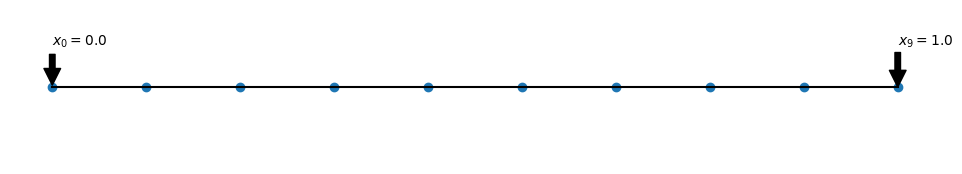

In [3]:
axis

Python in zero-based, so the first point in the axis is $x_0$ and the last of the ten points is $x_9$. You can get access to the coordinates of the points on the axis by the `coords` property:

In [4]:
axis.coords

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

To get a single point on the axis, you can use the shortcut

In [5]:
axis[0]

0.0

Note that this includes both specified endpoints like the default behavior of *numpy*'s `linspace` function. In fact, this is just an ordinary *numpy* array, so you can work with that as you are used to. For example, we can say

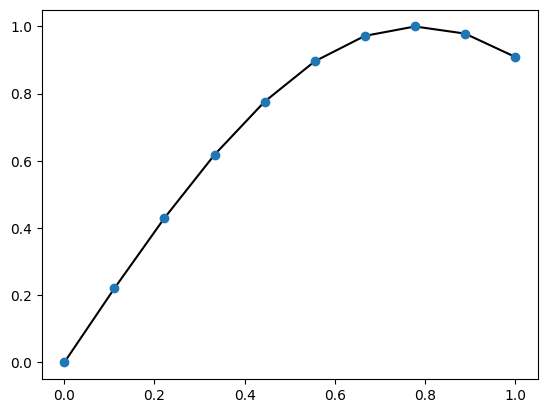

In [6]:
import numpy as np
import matplotlib.pyplot as plt

x = axis.coords
f = np.sin(2*x)

plt.plot(x, f, "-k")
plt.plot(x, f, "o")

But you can also do things with the axis that you cannot do with normal *numpy* arrays. For example, you may want to compute the derivative of an array on that grid. But before we can do this, we have to turn the axis into a grid. A grid is basically a collection of axes, which is particularly useful in case of multiple dimensions, of course. In order to create a grid, we can use the `Grid` class of *numgrids*. Then we can use the `Diff` class, which represents a derivative:

In [7]:
grid = Grid(axis)
d_dx = Diff(grid, 1)
df_dx = d_dx(f)

This should give $2\cos(2x)$ as the first derivative. Let's check:

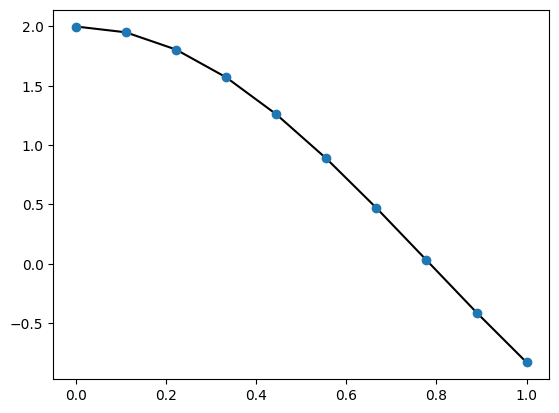

In [8]:
plt.plot(x, 2*np.cos(2*x), "-k")
plt.plot(x, df_dx, "o")

We have defined the derivative operator `d_dx` independent of the actual result. So we could simply apply it to several different arrays, if we wanted to.

In the case of equidistant, nonperiodic grid, the `Diff` class by default uses a 4th order accurate method to carry out the differentation.

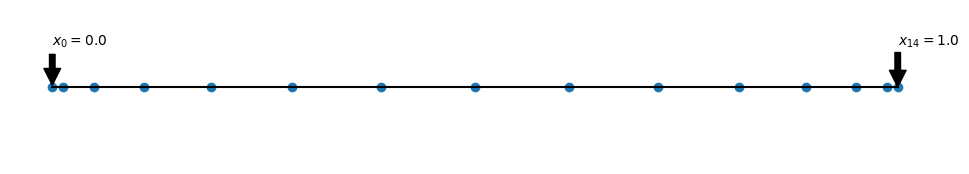

In [9]:
axis = Axis.of_type(AxisType.CHEBYSHEV, 15, 0, 1)
axis

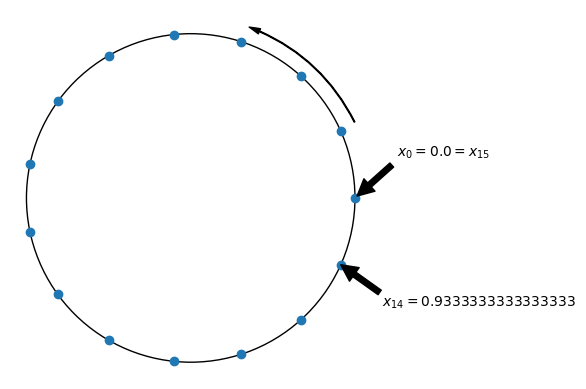

In [10]:
axis = Axis.of_type(AxisType.EQUIDISTANT_PERIODIC, 15, 0, 1)
axis

Note that the upper endpoint of the specified interval (in this case $x=1$) is NOT included in the coordinate array:

In [14]:
axis.coords

array([0.        , 0.06666667, 0.13333333, 0.2       , 0.26666667,
       0.33333333, 0.4       , 0.46666667, 0.53333333, 0.6       ,
       0.66666667, 0.73333333, 0.8       , 0.86666667, 0.93333333])

This is because due to the periodic boundary conditions, $x=1$ is identified with $x=0$:

In [17]:
axis[15]

0.0

Of course, you can also take derivative on periodic grids. The syntax is the same as for other kinds of axes:

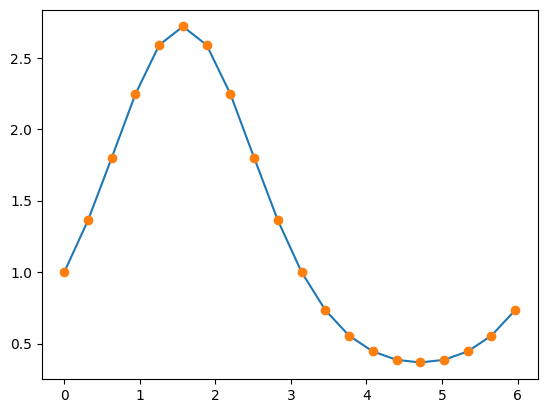

In [24]:
axis = Axis.of_type(AxisType.EQUIDISTANT_PERIODIC, 20, 0, 2*np.pi)
grid = Grid(axis)
x = grid.coords

# define a function which is periodic on our grid
f = np.exp(np.sin(x))

plt.plot(x, f)
plt.plot(x, f, "o")

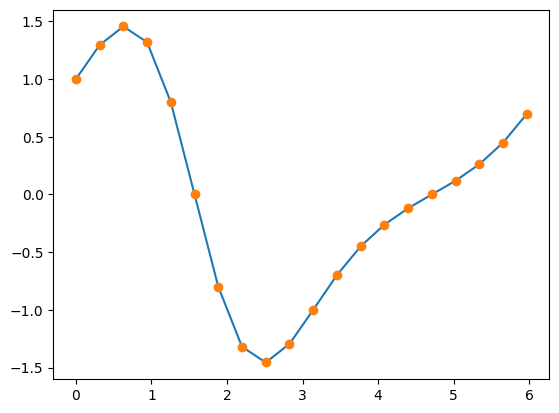

In [25]:
d_dx = Diff(grid, 1)
df_dx = d_dx(f)

plt.plot(x, df_dx)
plt.plot(x, df_dx, "o")
